<a href="https://colab.research.google.com/github/joungminhee/project/blob/master/churn_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [855]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [856]:
data = '/content/drive/MyDrive/Data/Churn_Modelling.csv'
df = pd.read_csv(data)

In [857]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [859]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [860]:
df.CreditScore.unique() # 앞번호대로 구간화 / age도 구간화해야징~!

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [861]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [862]:
df.describe(include='object')
# 스미스 이름 빈도수가 32개나 됨

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# 데이터 탐색

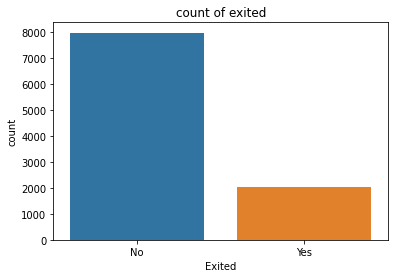

In [863]:
# 이탈율 확인
exited_plt = sns.countplot(x=df.Exited)
exited_plt.set_title('count of exited')
exited_plt.set_xticklabels(['No','Yes'])
# 눈금 이름 설정하기 : set_xticklabels(), set_yticklabels()
plt.show()

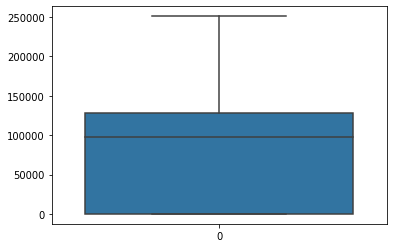

In [864]:
sns.boxplot(data=df['Balance'])
plt.show() 
# 이상치 없음 확인

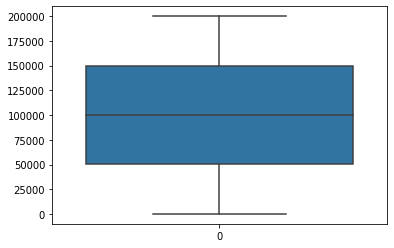

In [865]:
sns.boxplot(data=df['EstimatedSalary'])
plt.show() 
# 이상치 없음 확인

In [866]:
# 성별 이탈율 확인
df.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

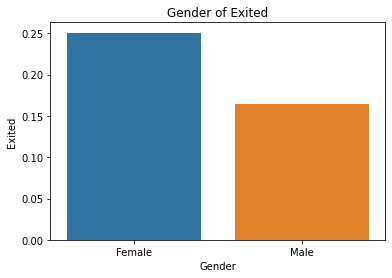

In [867]:
sns.barplot(x=df['Gender'], y=df['Exited'], data=df,ci=None)
plt.title('Gender of Exited')
plt.show()
# 여자가 남자보다 이탈율이 높음

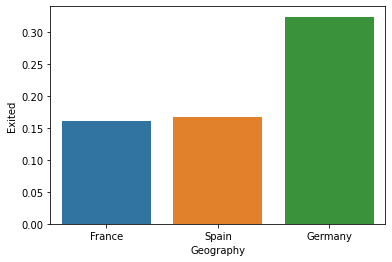

In [868]:
sns.barplot(x= 'Geography', y="Exited", data=df, ci=None)
plt.show()
# 독일 이탈율이 프랑스와 스페인보다 높음 확인

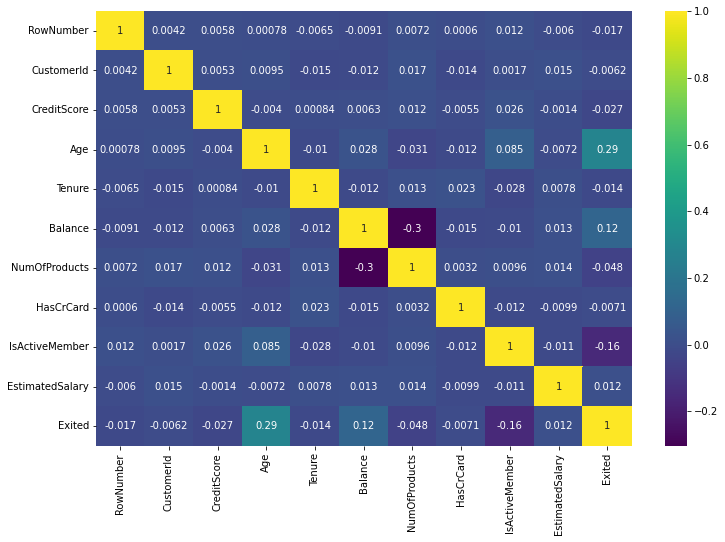

In [869]:
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()
# 이탈율 상관관계 그래프

In [870]:
# 회사와 오래 있었던 사람들의 이탈율 확인
df.groupby('Exited')['Tenure'].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

<Figure size 864x576 with 0 Axes>

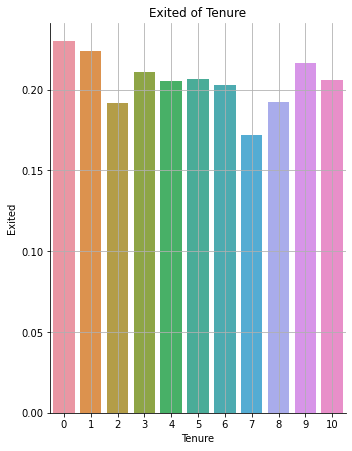

In [871]:
plt.figure(figsize=(12,8))
sns.catplot(x='Tenure', y='Exited',
            data=df,kind='bar', ci=None)
plt.title('Exited of Tenure')
plt.subplots_adjust(top=1.2)
plt.grid()
plt.show()

In [872]:
from matplotlib.gridspec import GridSpec
# 히스토그램과 박스플랏 합쳐서 시각화하기
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plt(column, title):
    fig = plt.figure(figsize=(12,8))
    grid = GridSpec(2,1, figure=fig)
    # 여러 그래프 한번에 그리기
    color = np.random.choice(colors,1)[0]

    ax0 = fig.add_subplot(grid[0,:])
    ax0.set_title(f'Histogram and boxplot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1,:])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

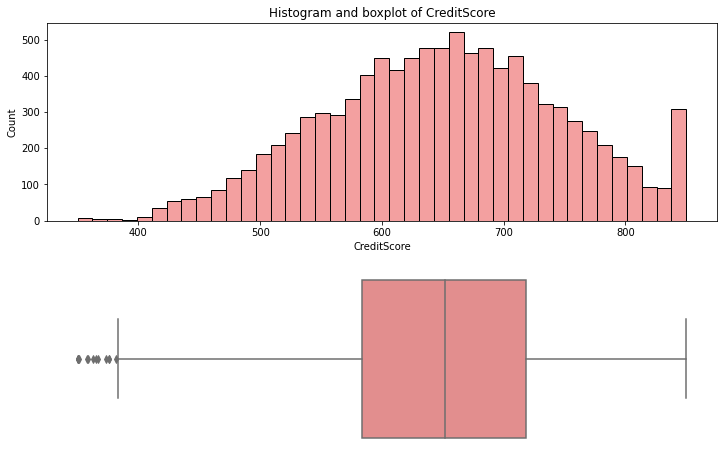

In [873]:
distribution_plt(df.CreditScore, 'CreditScore')

In [874]:
credit = df[['CreditScore','Exited']]
credit

,CreditScore,Exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
...,...,...
9995,771,0
9996,516,0
9997,709,1
9998,772,1


In [875]:
# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

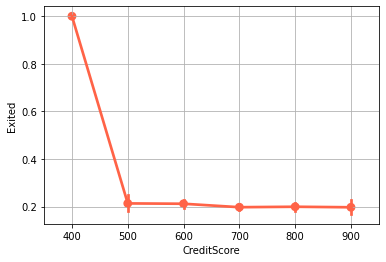

In [876]:
credit['CreditScore'] = pd.cut(credit['CreditScore'], bins=[0,400,500,600,700,800,900], 
                               labels=[400,500,600,700,800,900])
sns.pointplot(x='CreditScore', y='Exited', data=credit, color=colors[3])
plt.grid()
plt.show()

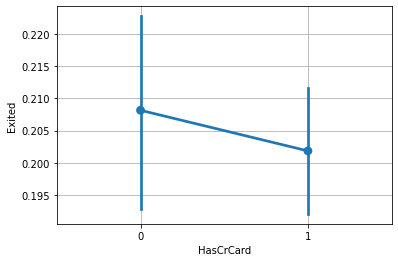

In [877]:
# 신용카드 유무의 이탈율 확인
sns.pointplot(x='HasCrCard', y='Exited', data=df)
plt.grid()
plt.show()

## 데이터 전처리

### 라벨인코더

In [878]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Geography']
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [879]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### 구간화하기(나이)

In [880]:
def age_category(age):
    age = int(np.floor(age // 10))
    return age
# 나이 몫만 구해서 카테고리화 시키기

In [881]:
df['Age_category'] = df.Age.apply(age_category)

In [882]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Age_category     10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.1+ MB


### 필요없는 컬럼 제거

In [883]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [884]:
df = df.drop(columns=['RowNumber','Age','Surname','CustomerId'])

In [885]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_category
0,619,0,0,2,0.00,1,1,1,101348.88,1,4
1,608,2,0,1,83807.86,1,0,1,112542.58,0,4
2,502,0,0,8,159660.80,3,1,0,113931.57,1,4
3,699,0,0,1,0.00,2,0,0,93826.63,0,3
4,850,2,0,2,125510.82,1,1,1,79084.10,0,4


### 구간화2(신용점수)

In [886]:
df['CreditScore'].unique()
# 신용점수도 9등급처럼 존재하듯이 이것도 9등급으로 비닝시켜 구간화 진행

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [887]:
score = list(df['CreditScore'])
bins = [100,200,300,400,500,600,700,800,900,1000]
labels = ['9등급','8등급','7등급','6등급','5등급','4등급','3등급','2등급','1등급']
df['CreditScore'] = pd.cut(df['CreditScore'],bins=bins,labels=labels)
# 신용점수가 높은것이 높은 등급을 받아야 하므로 라벨링을 바꿔서 해줌

In [888]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_category
0,4등급,0,0,2,0.00,1,1,1,101348.88,1,4
1,4등급,2,0,1,83807.86,1,0,1,112542.58,0,4
2,5등급,0,0,8,159660.80,3,1,0,113931.57,1,4
3,4등급,0,0,1,0.00,2,0,0,93826.63,0,3
4,2등급,2,0,2,125510.82,1,1,1,79084.10,0,4


In [889]:
df.CreditScore.value_counts()

4등급    3818
3등급    2471
5등급    2423
2등급     645
6등급     624
7등급      19
9등급       0
8등급       0
1등급       0
Name: CreditScore, dtype: int64

In [890]:
df.info()
# 카테고리화 확인 -> 더미변수 바꾸기 위하여

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  category
 1   Geography        10000 non-null  int64   
 2   Gender           10000 non-null  int64   
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   NumOfProducts    10000 non-null  int64   
 6   HasCrCard        10000 non-null  int64   
 7   IsActiveMember   10000 non-null  int64   
 8   EstimatedSalary  10000 non-null  float64 
 9   Exited           10000 non-null  int64   
 10  Age_category     10000 non-null  int64   
dtypes: category(1), float64(2), int64(8)
memory usage: 791.5 KB


### 원핫인코딩

In [891]:
df = pd.get_dummies(df)

In [892]:
df.shape

(10000, 19)

In [893]:
df.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_category,CreditScore_9등급,CreditScore_8등급,CreditScore_7등급,CreditScore_6등급,CreditScore_5등급,CreditScore_4등급,CreditScore_3등급,CreditScore_2등급,CreditScore_1등급
0,0,0,2,0.00,1,1,1,101348.88,1,4,0,0,0,0,0,1,0,0,0
1,2,0,1,83807.86,1,0,1,112542.58,0,4,0,0,0,0,0,1,0,0,0
2,0,0,8,159660.80,3,1,0,113931.57,1,4,0,0,0,0,1,0,0,0,0
3,0,0,1,0.00,2,0,0,93826.63,0,3,0,0,0,0,0,1,0,0,0
4,2,0,2,125510.82,1,1,1,79084.10,0,4,0,0,0,0,0,0,0,1,0


## 종속변수 생성

In [894]:
X = df.values.copy()
y = df.pop('Exited').values.copy()
print(X)
print(y)

[[0. 0. 2. ... 0. 0. 0.]
 [2. 0. 1. ... 0. 0. 0.]
 [0. 0. 8. ... 0. 0. 0.]
 ...
 [0. 0. 7. ... 1. 0. 0.]
 [1. 1. 3. ... 1. 0. 0.]
 [0. 0. 4. ... 1. 0. 0.]]
[1 0 1 ... 1 1 0]


### 데이터 셋 분리

In [895]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,
                                     test_size=0.2)

In [896]:
print(X_tr.shape, X_te.shape)

(8000, 19) (2000, 19)


### 데이터 표준화

In [897]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

In [898]:
X_tr

array([[ 1.50416548,  0.91670588, -0.00783352, ..., -0.57003687,
        -0.26312131,  0.        ],
       [-0.90442616, -1.09086243, -0.35406653, ..., -0.57003687,
        -0.26312131,  0.        ],
       [-0.90442616, -1.09086243, -1.39276556, ...,  1.75427249,
        -0.26312131,  0.        ],
       ...,
       [ 1.50416548, -1.09086243, -1.39276556, ..., -0.57003687,
        -0.26312131,  0.        ],
       [-0.90442616, -1.09086243,  1.37709852, ..., -0.57003687,
         3.80052831,  0.        ],
       [ 1.50416548,  0.91670588, -0.00783352, ..., -0.57003687,
        -0.26312131,  0.        ]])

### ANN

In [908]:
# tensorflow, keras
import tensorflow as tf
from tensorflow import keras
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5,
                              activation='relu',
                              input_shape=(19,)))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(X_tr, y_tr, batch_size=32, epochs=50, validation_split=0.4)
ann.summary()

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 0.5814 - accuracy: 0.7521 - val_loss: 0.4798 - val_accuracy: 0.8244
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8465 - val_loss: 0.2887 - val_accuracy: 0.8925
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9371 - val_loss: 0.1324 - val_accuracy: 0.9634
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9831 - val_loss: 0.0555 - val_accuracy: 0.9916
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9975 - val_loss: 0.0250 - val_accuracy: 0.9984
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9987 - val_loss: 0.0128 - val_accuracy: 0.9994
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9996 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 

In [909]:
ann.evaluate(X_te,y_te)

63/63 [==============================] - 0s 3ms/step - loss: 1.0884e-05 - accuracy: 1.0000


[1.0883770301006734e-05, 1.0]

In [840]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

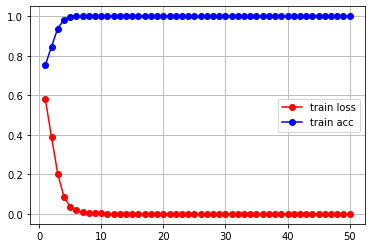

In [910]:
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 크로스 엔트로피
train_loss = history.history['loss']
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 정확도
train_acc = history.history['accuracy']

epochs = np.arange(1,51)
plt.plot(epochs, train_loss, 'ro-', label='train loss')
plt.plot(epochs, train_acc, 'bo-', label='train acc')
plt.grid()
plt.legend()
plt.show()

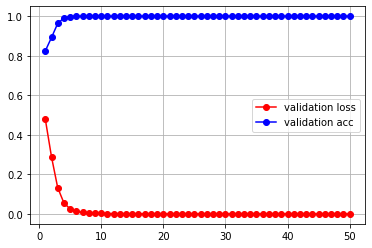

In [911]:
# 신경망 모델이 epoch 마다 계산한 검증 셋에서의 크로스 엔트로피(손실)
val_loss = history.history['val_loss']
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 정확도
val_acc = history.history['val_accuracy']

epochs = np.arange(1,51)
plt.plot(epochs, val_loss, 'ro-', label='validation loss')
plt.plot(epochs, val_acc, 'bo-', label='validation acc')
plt.grid()
plt.legend()
plt.show()
# 정확도가 떨어지면 손실은 올라가고, 정확도가 올라가면 손실은 내려가는 모습을 보임. 검증셋의 학습 곡선

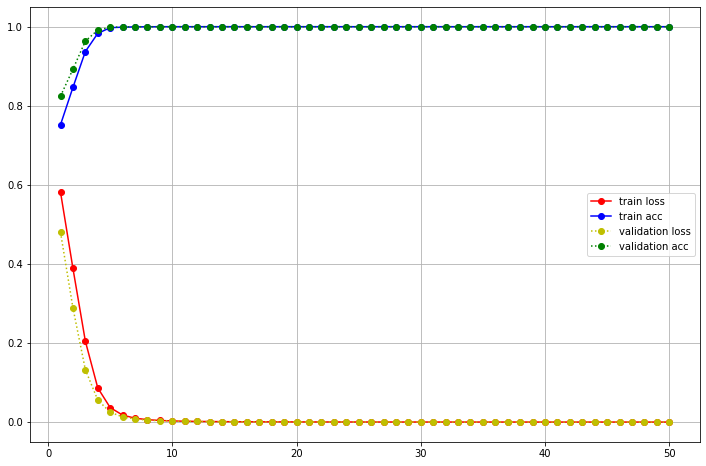

In [912]:
plt.figure(figsize=(12,8))
ephochs= np.arange(1,51)
plt.plot(epochs, train_loss, 'ro-', label='train loss')
plt.plot(epochs, train_acc, 'bo-', label='train acc')

plt.plot(epochs, val_loss, 'yo:', label='validation loss')
plt.plot(epochs, val_acc, 'go:', label='validation acc')

plt.grid()
plt.legend()
plt.show()

In [913]:
y_pred=ann.predict(X_te)
y_pred=(y_pred>0.5)

In [914]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_te, y_pred))

1.0


In [915]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_te, y_pred))

[[1616    0]
 [   0  384]]
